In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-business-rankings-2020/Top250.csv
/kaggle/input/restaurant-business-rankings-2020/Future50.csv
/kaggle/input/restaurant-business-rankings-2020/Independence100.csv


In [87]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [88]:
indie_resto = pd.read_csv("../input/restaurant-business-rankings-2020/Independence100.csv")

From the call above, we get this table.

In [89]:
indie_resto.head(10)

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0
5,6,Gibsons Bar & Steakhouse,25409952.0,80,Chicago,Ill.,348567.0
6,7,Top of the World at the STRAT,25233543.0,103,Las Vegas,Nev.,246054.0
7,8,Maple & Ash,24837595.0,99,Chicago,Ill.,210832.0
8,9,Balthazar,24547800.0,87,New York,N.Y.,519000.0
9,10,Smith & Wollensky,24501000.0,107,New York,N.Y.,257364.0


- Restaurant: Name of the Restaurant
- Sales: Annual sales in USD
- Average Check: Average customer expenses per visit (USD/number of visits)
- City: City of origin of the restaurant
- State: State of origin of the restaurant
- Meals served: Number of meals served

In [90]:
indie_resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           100 non-null    int64  
 1   Restaurant     100 non-null    object 
 2   Sales          100 non-null    float64
 3   Average Check  100 non-null    int64  
 4   City           100 non-null    object 
 5   State          100 non-null    object 
 6   Meals Served   100 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


# Data Preparation

## Rename Some Columns

Rename some columns to add unit info on each column

In [91]:
# Rename the 'Sales' column into 'Sales (USD)'
indie_resto = indie_resto.rename(columns={'Average Check': 'Average Check by Visits (USD)',
                                         'Sales': 'Sales (USD)', 'Meals Served': 'Meals Served (pcs)'})

## Creates new column to see the average price of every meal

This important to know the food quality and customer habit of each restaurant

In [92]:
# Figure out the average price by dividing total sales and total meals served
Meals_Price = (indie_resto['Sales (USD)'] / indie_resto['Meals Served (pcs)']).round(2)
indie_resto['Average Meals Price (USD)'] = Meals_Price
indie_resto

,Rank,Restaurant,Sales (USD),Average Check by Visits (USD),City,State,Meals Served (pcs),Average Meals Price (USD)
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0,83.18
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0,42.91
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0,32.60
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,135.60
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0,66.75
...,...,...,...,...,...,...,...,...
95,96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0,48.78
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0,139.97
97,98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0,53.19
98,99,Upland,11965564.0,52,New York,N.Y.,171825.0,69.64


In [93]:
# Check the Result
indie_resto.head(10)

,Rank,Restaurant,Sales (USD),Average Check by Visits (USD),City,State,Meals Served (pcs),Average Meals Price (USD)
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0,83.18
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0,42.91
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0,32.60
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,135.60
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0,66.75
5,6,Gibsons Bar & Steakhouse,25409952.0,80,Chicago,Ill.,348567.0,72.90
6,7,Top of the World at the STRAT,25233543.0,103,Las Vegas,Nev.,246054.0,102.55
7,8,Maple & Ash,24837595.0,99,Chicago,Ill.,210832.0,117.81
8,9,Balthazar,24547800.0,87,New York,N.Y.,519000.0,47.30
9,10,Smith & Wollensky,24501000.0,107,New York,N.Y.,257364.0,95.20


# Restaurant-based Analysis

## Restaurant Rank

### Top 10 Restaurant with Highest Yearly Sale Number

The table below shows that New York City dominated the top 10 list with 5 restaurants. From the samples, no restaurant reached 40 Million USD in sales.

In [94]:
sales_large = indie_resto.nlargest(n=10, columns='Sales (USD)').sort_values('Sales (USD)', ascending=False)
sales_large

,Rank,Restaurant,Sales (USD),Average Check by Visits (USD),City,State,Meals Served (pcs),Average Meals Price (USD)
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0,83.18
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0,42.91
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0,32.60
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,135.60
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0,66.75
5,6,Gibsons Bar & Steakhouse,25409952.0,80,Chicago,Ill.,348567.0,72.90
6,7,Top of the World at the STRAT,25233543.0,103,Las Vegas,Nev.,246054.0,102.55
7,8,Maple & Ash,24837595.0,99,Chicago,Ill.,210832.0,117.81
8,9,Balthazar,24547800.0,87,New York,N.Y.,519000.0,47.30
9,10,Smith & Wollensky,24501000.0,107,New York,N.Y.,257364.0,95.20


### Top 10 Restaurant with Highest Check by Visit rate

The table below shows the restaurant that costs the most money when visited. The top 3 of them are located in Big Cities like New York & Las Vegas. No restaurant reaches USD 200 for each check.

In [95]:
check_large = indie_resto.nlargest(n=10, columns='Average Check by Visits (USD)').sort_values('Average Check by Visits (USD)', ascending=False)
check_large

,Rank,Restaurant,Sales (USD),Average Check by Visits (USD),City,State,Meals Served (pcs),Average Meals Price (USD)
31,32,Del Posto,18625033.0,194,New York,N.Y.,95000.0,196.05
37,38,Prime Steakhouse,18248030.0,173,Las Vegas,Nev.,113600.0,160.63
21,22,SW Steakhouse,21523650.0,149,Las Vegas,Nev.,145700.0,147.73
11,12,Prime 112,23800000.0,135,Miami Beach,Fla.,206000.0,115.53
63,64,Prime & Provisions,15100000.0,130,Chicago,Ill.,116154.0,130.00
20,21,Bazaar Meat by Jose Andres,22181607.0,119,Las Vegas,Nev.,190000.0,116.75
45,46,Swift & Sons,17637400.0,119,Chicago,Ill.,195343.0,90.29
30,31,Quality Meats,18678000.0,115,New York,N.Y.,165148.0,113.10
79,80,BOA Steakhouse,13552485.0,110,West Hollywood,Calif.,123204.0,110.00
17,18,Gibsons Italia,22749232.0,108,Chicago,Ill.,252962.0,89.93


### Top 10 Restaurant with Highest Number of Served Meal

A big surprise because only 2 independent restaurants from New York City are in the top 10 list. Meanwhile, 2 of the top 3 restaurants are located in Frankenmuth, Michigan. With the served meals up to almost 1 million pcs. But, they both didn't reach 20 Million USD in sales because their price is 10 times lower than our highest restaurant.

In [96]:
meal_large = indie_resto.nlargest(n=10, columns='Meals Served (pcs)').sort_values('Meals Served (pcs)', ascending=False)
meal_large

,Rank,Restaurant,Sales (USD),Average Check by Visits (USD),City,State,Meals Served (pcs),Average Meals Price (USD)
57,58,Zehnder's of Frankenmuth,16063684.0,17,Frankenmuth,Mich.,959026.0,16.75
13,14,Junior's (Times Square),23640652.0,23,New York,N.Y.,914500.0,25.85
49,50,Frankenmuth Bavarian Inn,17388751.0,19,Frankenmuth,Mich.,899284.0,19.34
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0,32.60
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0,42.91
42,43,Junior's (49th Street),17834390.0,22,New York,N.Y.,798000.0,22.35
14,15,The Hamilton,23138062.0,33,Washington,D.C.,700861.0,33.01
41,42,"Founding Farmers (Washington, D.C.)",17910045.0,33,Washington,D.C.,648096.0,27.63
29,30,Bob Chinn's Crab House,18687601.0,48,Wheeling,Ill.,625907.0,29.86
46,47,Harris Ranch Inn & Restaurant,17599468.0,29,Coalinga,Calif.,611928.0,28.76


### Top 10 Most Expensive Restaurant

We have a bit different list result than the 'Top 10 Restaurant with Highest Check by Visit Rate', which means the majority of the customers only bought 1 pcs of meal when they visited the restaurant, even though some of them bought more than one.

In [97]:
price_large = indie_resto.nlargest(n=10, columns='Average Meals Price (USD)').sort_values('Average Meals Price (USD)', ascending=False)
price_large

,Rank,Restaurant,Sales (USD),Average Check by Visits (USD),City,State,Meals Served (pcs),Average Meals Price (USD)
31,32,Del Posto,18625033.0,194,New York,N.Y.,95000.0,196.05
37,38,Prime Steakhouse,18248030.0,173,Las Vegas,Nev.,113600.0,160.63
36,37,Lavo Italian Restaurant & Lounge,18386262.0,97,Las Vegas,Nev.,115500.0,159.19
21,22,SW Steakhouse,21523650.0,149,Las Vegas,Nev.,145700.0,147.73
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0,139.97
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,135.60
63,64,Prime & Provisions,15100000.0,130,Chicago,Ill.,116154.0,130.00
55,56,Delmonico Steakhouse,16154000.0,103,Las Vegas,Nev.,133000.0,121.46
7,8,Maple & Ash,24837595.0,99,Chicago,Ill.,210832.0,117.81
20,21,Bazaar Meat by Jose Andres,22181607.0,119,Las Vegas,Nev.,190000.0,116.75


## Restaurant Scatter-plot

Text(0.5, 1.0, 'Scatter Plot of Sales vs. Meals Served by Restaurant')

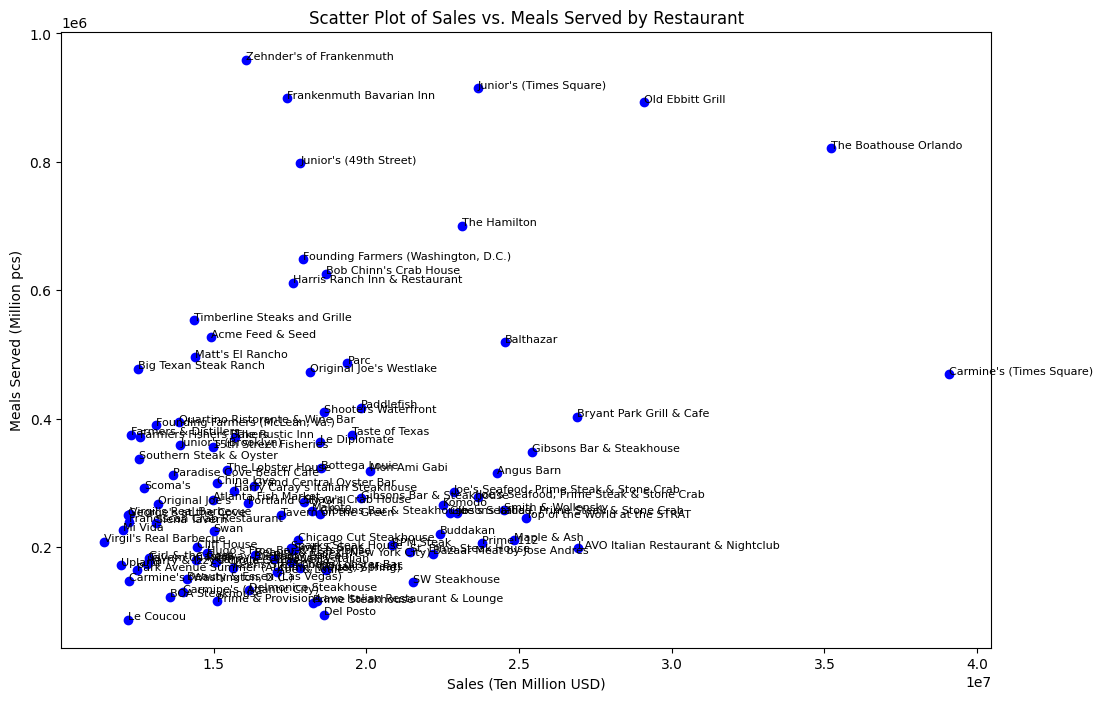

In [98]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(indie_resto['Sales (USD)'], indie_resto['Meals Served (pcs)'], c='blue', marker='o')

# Add labels for each restaurant
for i, row in indie_resto.iterrows():
    plt.text(row['Sales (USD)'], row['Meals Served (pcs)'], row['Restaurant'], fontsize=8)

# Add labels and title
plt.xlabel('Sales (Ten Million USD)')
plt.ylabel('Meals Served (Million pcs)')
plt.title('Scatter Plot of Sales vs. Meals Served by Restaurant')

From the scatterplot above we can see that if the meal served number is getting smaller, most of the sales number is getting smaller too. Even though, the standard deviation number is big. That is caused by other things that are related to the price of the meals. That's why some samples with high prices still have big sales numbers even though they served a small number of meals.

Text(0.5, 1.0, 'Scatter Plot of Sales vs. Meal Price at the Restaurant')

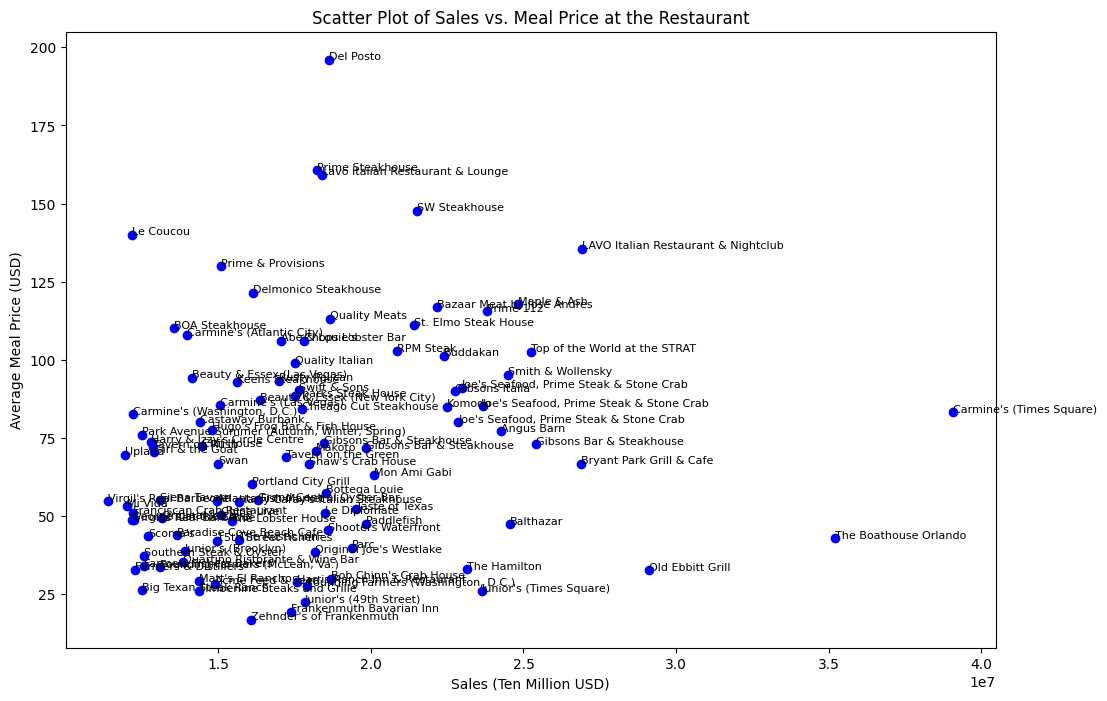

In [99]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(indie_resto['Sales (USD)'], indie_resto['Average Meals Price (USD)'], c='blue', marker='o')

# Add labels for each restaurant
for i, row in indie_resto.iterrows():
    plt.text(row['Sales (USD)'], row['Average Meals Price (USD)'], row['Restaurant'], fontsize=8)

# Add labels and title
plt.xlabel('Sales (Ten Million USD)')
plt.ylabel('Average Meal Price (USD)')
plt.title('Scatter Plot of Sales vs. Meal Price at the Restaurant')

The above scatter-plot also has the same pattern. If the meal prices are cheap, the possibility of getting lower sales numbers is bigger, compared to the restaurant with expensive meals. Even though the standard deviation number is big. That is caused  by the number of meals served which depends on many other things

Text(0.5, 1.0, 'Scatter Plot of Meals Price vs. Meals Served by Restaurant')

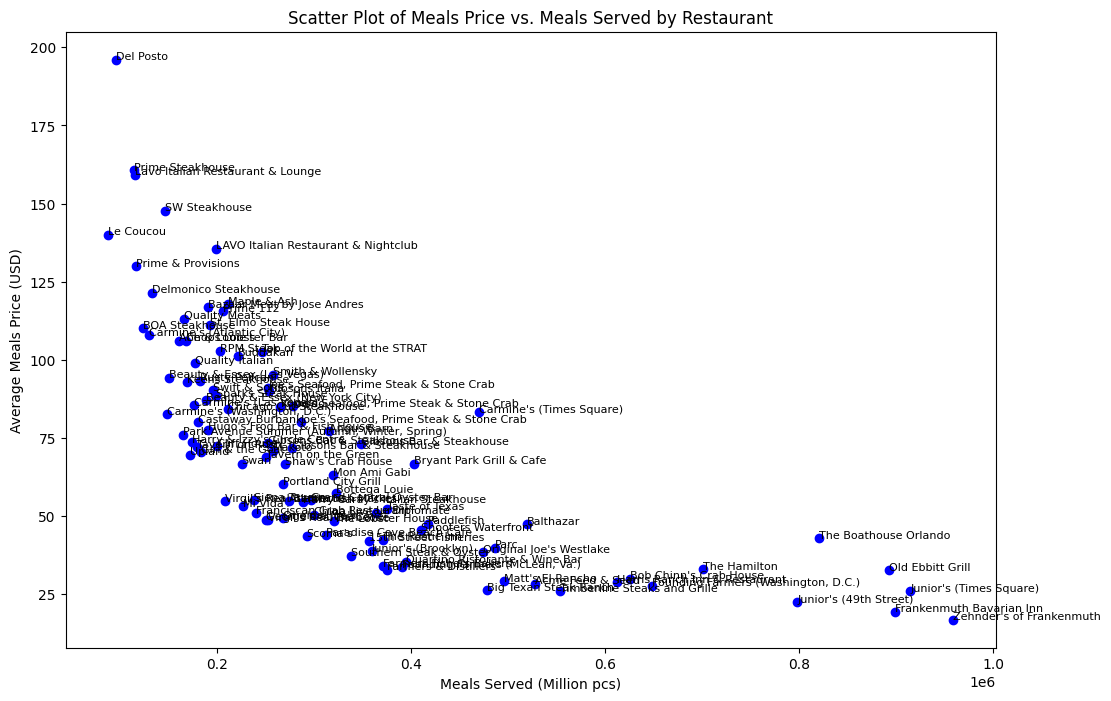

In [100]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(indie_resto['Meals Served (pcs)'], indie_resto['Average Meals Price (USD)'], c='blue', marker='o')

# Add labels for each restaurant
for i, row in indie_resto.iterrows():
    plt.text(row['Meals Served (pcs)'], row['Average Meals Price (USD)'], row['Restaurant'], fontsize=8)

# Add labels and title
plt.xlabel('Meals Served (Million pcs)')
plt.ylabel('Average Meals Price (USD)')
plt.title('Scatter Plot of Meals Price vs. Meals Served by Restaurant')

It forms a polynomial regression line showing that the cheaper your meal is, you will get more customers. 

Text(0.5, 1.0, 'Scatter Plot of Meals Price vs. Meals Served by Restaurant')

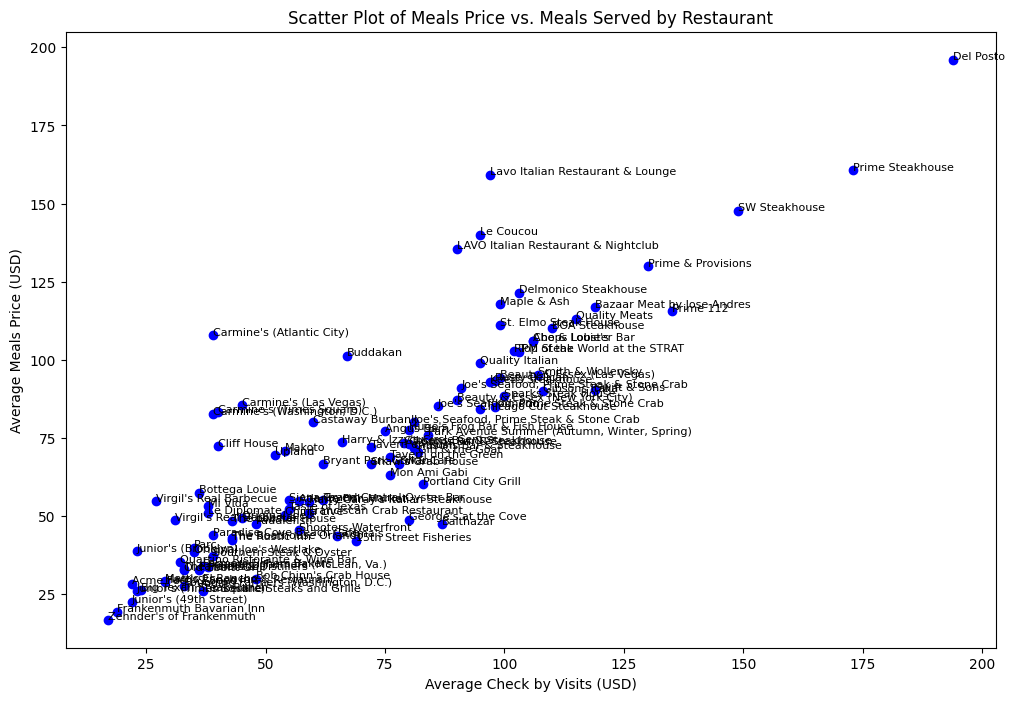

In [101]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(indie_resto['Average Check by Visits (USD)'], indie_resto['Average Meals Price (USD)'], c='blue', marker='o')

# Add labels for each restaurant
for i, row in indie_resto.iterrows():
    plt.text(row['Average Check by Visits (USD)'], row['Average Meals Price (USD)'], row['Restaurant'], fontsize=8)

# Add labels and title
plt.xlabel('Average Check by Visits (USD)')
plt.ylabel('Average Meals Price (USD)')
plt.title('Scatter Plot of Meals Price vs. Meals Served by Restaurant')

This scatterplot makes my argument, that most of the customers only bought 1 meal in every visit, stronger. The relation between check value and meal price forms a linear line.

# City-based Analysis

## Number of Independent Restaurant at each City

The number of restaurants in a city is a good parameter to know the civilization status of the city. If there are a lot of restaurants (especially independent restaurants that usually create cultural food), that means there are a lot of people inside the city and its economic movement is fast.

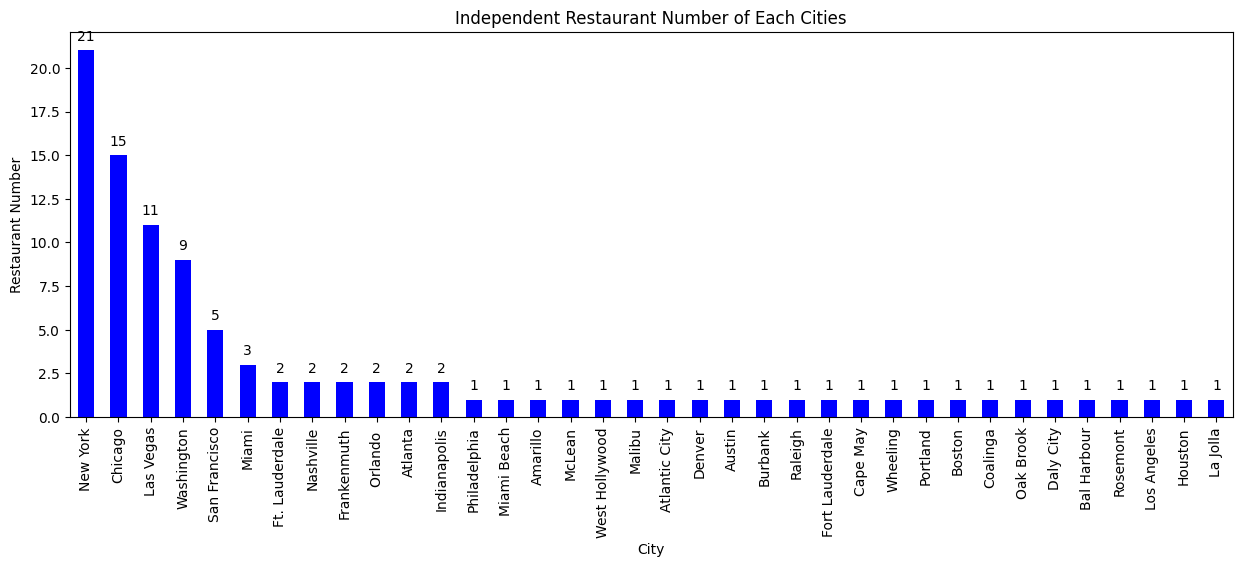

In [102]:
# Plotting the bar chart
plt.figure(figsize=(15, 5))
bar_plot = indie_resto['City'].value_counts(dropna=False).plot.bar(color=['blue'])

# Annotating each bar with the count
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Independent Restaurant Number of Each Cities')
plt.xlabel('City')
plt.ylabel('Restaurant Number')
plt.show()

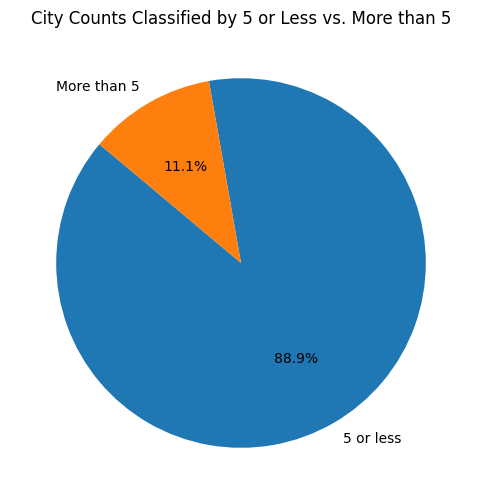

In [111]:
# Get the value counts of the 'City' column
city_counts = indie_resto['City'].value_counts()

# Classify the counts into two categories
classified = city_counts.apply(lambda x: 'More than 5' if x > 5 else '5 or less')

# Group by classification and aggregate the counts
grouped = classified.groupby(classified).size()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('City Counts Classified by 5 or Less vs. More than 5')
plt.show()

From the bar chart above we can see that almost 90% of US cities have 5 or less numbers of Independent Restaurants. Even only 3 US Cities have more than 10 independent restaurants. Those are New York, Chicago, Las Vegas, and Washington

## Number of Sales at Each Cities

In [104]:
# Calculate the total sales by city
total_sales_by_city = indie_resto.groupby('City')['Sales (USD)'].sum().reset_index()

# Rename the columns for clarification
total_sales_by_city.columns = ['City', 'Total Sales (USD)']

# Sort the value
total_sales_by_city = total_sales_by_city.sort_values(by='Total Sales (USD)', ascending=False).round(2)

# Display the result
print('Total Sales by City')
print(total_sales_by_city)

Total Sales by City
               City  Total Sales (USD)
25         New York        406473807.0
8           Chicago        268481978.0
18        Las Vegas        205296684.0
33       Washington        161413973.0
32    San Francisco         67681136.0
27         Orlando          55047864.0
22            Miami         54481741.0
14   Ft. Lauderdale         34301433.0
16     Indianapolis         34232062.0
13      Frankenmuth         33452435.0
1           Atlanta         32788750.0
24        Nashville         27463743.0
30          Raleigh         24268160.0
23      Miami Beach         23800000.0
26        Oak Brook         19831818.0
15          Houston         19530159.0
28     Philadelphia         19379153.0
35         Wheeling         18687601.0
19      Los Angeles         18521000.0
31         Rosemont         18483056.0
4       Bal Harbour         18216906.0
10        Daly City         18159612.0
9          Coalinga         17599468.0
5            Boston         17063477.0
29   

In [105]:
# Calculate the average sales by city
total_meals_by_city = indie_resto.groupby('City')['Meals Served (pcs)'].sum().reset_index()

# Rename the columns for clafication
total_meals_by_city.columns = ['City', 'Total Meals Served (pcs)']

# Sort the value
total_meals_by_city = total_meals_by_city.sort_values(by='Total Meals Served (pcs)', ascending=False)

# Display the result
print('Total Meal Served by City')
print(total_meals_by_city)

Total Sales by City
               City  Total Meals Served (pcs)
25         New York                 6353408.0
33       Washington                 4003941.0
8           Chicago                 3533482.0
18        Las Vegas                 2083551.0
13      Frankenmuth                 1858310.0
32    San Francisco                 1299434.0
27         Orlando                  1238319.0
24        Nashville                  865050.0
14   Ft. Lauderdale                  780752.0
22            Miami                  672000.0
35         Wheeling                  625907.0
9          Coalinga                  611928.0
11           Denver                  553378.0
3            Austin                  495927.0
28     Philadelphia                  486219.0
0          Amarillo                  478000.0
10        Daly City                  473492.0
1           Atlanta                  442000.0
21           McLean                  390104.0
15          Houston                  375241.0
16     Indiana

From the tables above we can see that the top 5 of sales and meals served are coming from other cities where the number of independent restaurants there are less than 5. This can be proof that independent restaurants are one of the cities' uniqueness and are respected by the people, respected more than the big cities, because there are more franchises there, too. 

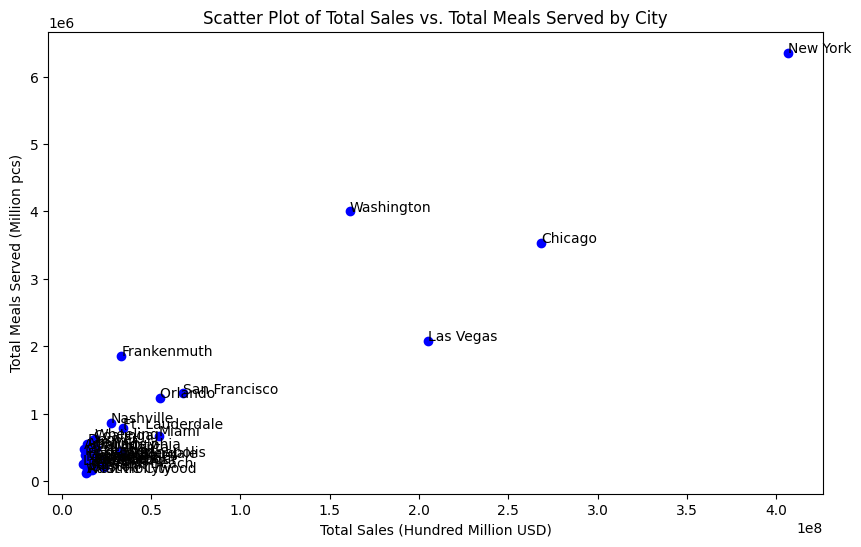

In [107]:
# Merge the DataFrames on the 'City' column
merged_df = pd.merge(total_sales_by_city, total_meals_by_city, on='City')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Total Sales (USD)'], merged_df['Total Meals Served (pcs)'], c='blue', marker='o')

# Add labels for each city
for i, row in merged_df.iterrows():
    plt.text(row['Total Sales (USD)'], row['Total Meals Served (pcs)'], row['City'])

# Add labels and title
plt.xlabel('Total Sales (Hundred Million USD)')
plt.ylabel('Total Meals Served (Million pcs)')
plt.title('Scatter Plot of Total Sales vs. Total Meals Served by City')

# Display the plot
plt.show()

From the chart above we can see that New York, Washington, Chicago, and Las Vegas ruled the economy. That is caused by their number of independent restaurants that are far more compared to any other city. Most cities have fewer than 5 independent restaurants, but NY has 21.

In [109]:
# Calculate the average sales by city
average_price_by_city = indie_resto.groupby('City')['Average Meals Price (USD)'].mean().reset_index()

# Rename the columns for clarity
average_price_by_city.columns = ['City', 'Average Meals Price (USD)']
average_price_by_city['Average Meals Price (USD)'] = average_price_by_city['Average Meals Price (USD)'].round(2)
average_price_by_city = average_price_by_city.sort_values(by='Average Meals Price (USD)', ascending=False)

print('Average Meal Price of Every City')
print(average_price_by_city)

Average Meal Price of Every City
               City  Average Meals Price (USD)
23      Miami Beach                     115.53
34   West Hollywood                     110.00
2     Atlantic City                     107.91
18        Las Vegas                     107.79
5            Boston                     106.14
16     Indianapolis                      92.34
25         New York                      83.37
22            Miami                      81.63
8           Chicago                      80.67
1           Atlanta                      80.34
6           Burbank                      79.90
30          Raleigh                      77.04
31         Rosemont                      73.22
26        Oak Brook                      71.74
4       Bal Harbour                      70.93
29         Portland                      60.10
19      Los Angeles                      57.42
32    San Francisco                      53.29
15          Houston                      52.05
17         La Jolla        

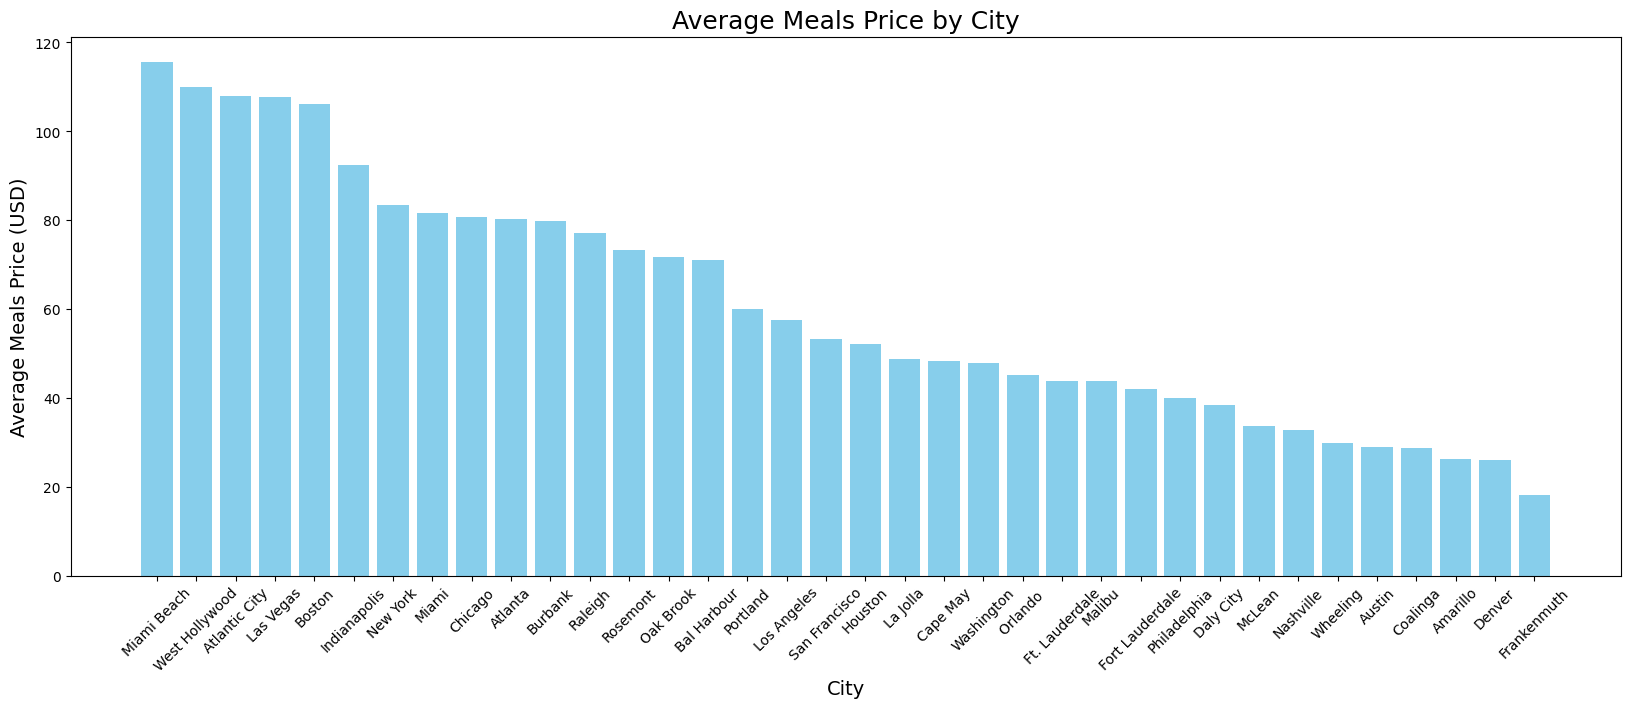

In [110]:
# Sort the DataFrame by 'Average Meals Price (dollars)' in descending order
average_price_by_city = average_price_by_city.sort_values(by='Average Meals Price (USD)', ascending=False)

# Create the bar chart
plt.figure(figsize=(20, 7))
plt.bar(average_price_by_city['City'], average_price_by_city['Average Meals Price (USD)'], color='skyblue')

# Add labels and title
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Meals Price (USD)',fontsize=14)
plt.xticks(rotation=45)
plt.title('Average Meals Price by City', fontsize=18)

# Display the plot
plt.show()

The top 5 most expensive independent restaurants come from well-known cities like Miami Beach, West Hollywood, Las Vegas, Boston, and Atlantic City, and as we predicted earlier, foods in Frankenmuth are the cheapest

# Conclusion

The Data Above shows that
1. There are some cities with a lot of restaurants, but if you can create the best restaurant, you can get a huge number of sales
2. The more expensive your food is, the fewer meals you'll served
3. But fewer meals don't mean you'll get fewer sales, if your price and your service are correct, you can get enough sales, too.